### Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

2024-11-03 15:44:19.603758: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 15:44:19.843333: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 15:44:20.078626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-03 15:44:20.299539: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-03 15:44:20.363966: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-03 15:44:20.759131: I tensorflow/core/platform/cpu_feature_gu

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix

### Load the dataset

In [3]:
data = pd.read_csv("/home/darshan/Downloads/creditcard.csv")

In [4]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
print(list(data.columns))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Preprocessing the dataset

In [7]:
data.isna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
print("Unique labels are :" , data.Class.unique())

Unique labels are : [0 1]


In [10]:
print("Total count of labels : ", pd.value_counts(data.Class))

Total count of labels :  Class
0    284315
1       492
Name: count, dtype: int64


### Visualizing the dataset

Text(0, 0.5, 'Frequency')

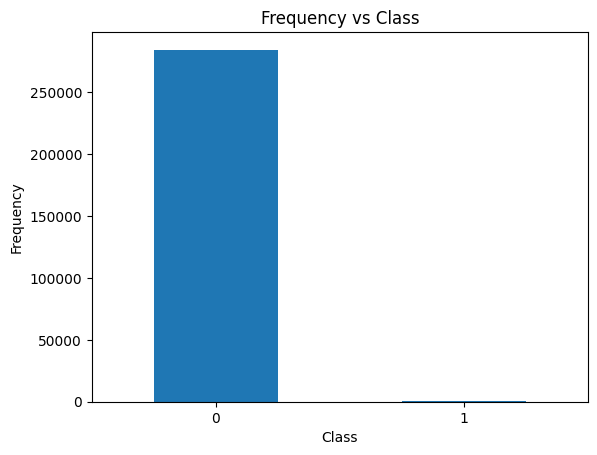

In [11]:
count_Classes = pd.value_counts(data.Class)
count_Classes.plot(kind='bar',rot=0)
plt.title("Frequency vs Class")
plt.xlabel("Class")
plt.ylabel("Frequency")

### Visualizing relationship between fraud and normal transactions

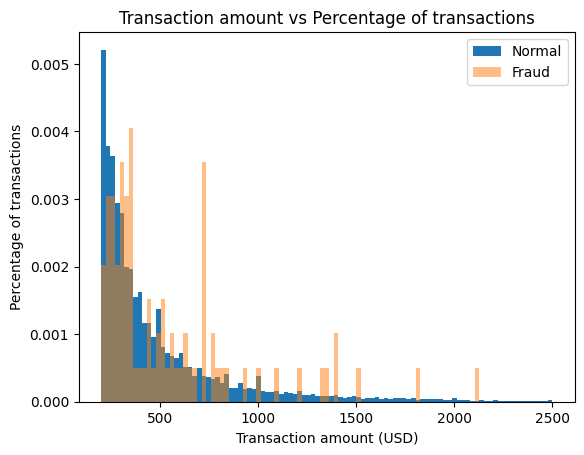

In [12]:
normal_dataset = data[data.Class == 0]
fraud_dataset = data[data.Class == 1]

bins = np.linspace(200, 2500, 100)
plt.hist(normal_dataset.Amount, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_dataset.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')
plt.legend()
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");

### Scalling 

In [13]:
sc=StandardScaler()
data['Time'] = sc.fit_transform(data.Time.values.reshape(-1, 1))
data['Amount'] = sc.fit_transform(data.Amount.values.reshape(-1, 1))

### Converting normal transactions to fraud for making balanced dataset

#### Original dataset

In [14]:
print(pd.value_counts(data.Class))

Class
0    284315
1       492
Name: count, dtype: int64


In [15]:
perc_to_convert = 0.05 # 5%
normal_transactions = data[data.Class ==0]
no_to_convert = int(len(normal_transactions) * perc_to_convert)
normal_to_fraud = normal_transactions.sample(n=no_to_convert, random_state=2021)
data.loc[normal_to_fraud.index, 'Class'] = 1

### New dataset

In [16]:
print(pd.value_counts(data.Class))

Class
0    270100
1     14707
Name: count, dtype: int64


### Visualizing balanced dataset

Text(0, 0.5, 'frequency')

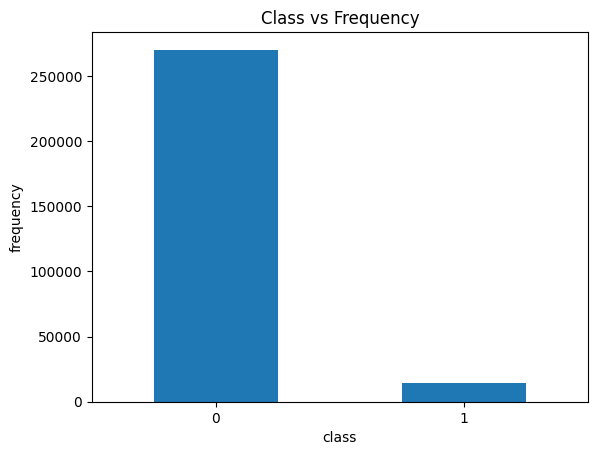

In [17]:
pd.value_counts(data.Class).plot(kind='bar',rot=0)
plt.title("Class vs Frequency")
plt.xlabel("class")
plt.ylabel("frequency")

### Normalizing test and train data

In [18]:
raw_data = data.values
raw_data

array([[-1.99658302, -1.35980713, -0.07278117, ..., -0.02105305,
         0.24496426,  0.        ],
       [-1.99658302,  1.19185711,  0.26615071, ...,  0.01472417,
        -0.34247454,  0.        ],
       [-1.99656197, -1.35835406, -1.34016307, ..., -0.05975184,
         1.16068593,  0.        ],
       ...,
       [ 1.6419735 ,  1.91956501, -0.30125385, ..., -0.02656083,
        -0.0818393 ,  0.        ],
       [ 1.6419735 , -0.24044005,  0.53048251, ...,  0.10453282,
        -0.31324853,  0.        ],
       [ 1.64205773, -0.53341252, -0.18973334, ...,  0.01364891,
         0.51435531,  0.        ]])

In [19]:
labels = raw_data[:, -1] ## WE ONLY WANT CLASS COLUMN
dataa  = raw_data[:, 0:-1]

#### Train test split

In [20]:
train_data,test_data,train_labels, test_labels = train_test_split(dataa, labels, test_size=0.2, random_state= 2021)

In [21]:
train_data

array([[-0.52838247, -2.92684033,  2.47273041, ...,  0.08986824,
        -0.47605771, -0.35015087],
       [ 1.24402086, -0.61349305,  1.00140037, ..., -0.00655755,
         0.0860586 , -0.34807186],
       [ 1.04222278,  1.98523138,  0.58883944, ...,  0.0190685 ,
         0.01616154, -0.34923131],
       ...,
       [-0.30116747,  1.19208747,  0.25627519, ...,  0.02516276,
         0.01634384, -0.31800625],
       [ 1.03314681,  2.08638408, -1.00105052, ..., -0.05226135,
        -0.0506832 ,  0.04917798],
       [-0.66193182,  1.17892159,  0.21802427, ...,  0.04006068,
         0.01435505, -0.34923131]])

In [22]:
train_labels

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
min_value = tf.reduce_min(train_data)
max_value = tf.reduce_max(train_data)

train_data = (train_data-min_value)/(max_value-min_value)
test_data = (test_data-min_value)/(max_value-min_value)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

2024-11-03 15:44:31.444687: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 54682800 exceeds 10% of free system memory.
2024-11-03 15:44:31.547312: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 54682800 exceeds 10% of free system memory.
2024-11-03 15:44:31.673533: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 54682800 exceeds 10% of free system memory.
2024-11-03 15:44:31.721771: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 54682800 exceeds 10% of free system memory.
2024-11-03 15:44:31.845945: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 54682800 exceeds 10% of free system memory.


### Creating normal and fraud datasets

In [24]:
normal_train_data= train_data[~train_labels]
normal_test_data= test_data[~test_labels]
fraud_train_data= train_data[train_labels]
fraud_test_data= test_data[test_labels]

print(" No. of records in Fraud Train Data=",len(fraud_train_data))
print(" No. of records in Normal Train data=",len(normal_train_data))
print(" No. of records in Fraud Test Data=",len(fraud_test_data))
print(" No. of records in Normal Test data=",len(normal_test_data))

 No. of records in Fraud Train Data= 11716
 No. of records in Normal Train data= 216129
 No. of records in Fraud Test Data= 2991
 No. of records in Normal Test data= 53971


### Initailization

In [25]:
epochs = 11
batch_size = 64
input_dim = normal_train_data.shape[1]
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2)
hidden_dim_2=4
learning_rate = 1e-7

### Autoencoder architecture

In [26]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim,))

#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",
                        activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 14)             │           434 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 14)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,168 (4.56 KB)

 Trainable params: 1,168 (4.56 KB)

 Non-trainable params: 0 (0.00 B)

### Callback and early stopping

In [27]:
## checkpoint
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.keras",mode='min', monitor='val_loss', verbose=2, save_best_only=True)

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True)

#### Compile autoencode

In [28]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

#### Train autoencoder

In [29]:
history = autoencoder.fit(normal_train_data, normal_train_data,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_data, test_data),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/11
3364/3378 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0260 - loss: 0.0265
Epoch 1: val_loss improved from inf to 0.00002, saving model to autoencoder_fraud.keras
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0260 - loss: 0.0264 - val_accuracy: 0.0813 - val_loss: 1.9991e-05
Epoch 2/11
3372/3378 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0653 - loss: 1.9112e-05
Epoch 2: val_loss did not improve from 0.00002
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0653 - loss: 1.9112e-05 - val_accuracy: 0.1279 - val_loss: 2.0058e-05
Epoch 3/11
3370/3378 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0682 - loss: 1.9173e-05
Epoch 3: val_loss did not improve from 0.00002
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0682 - loss: 1.9173e-05 - val_accuracy: 0.0351 - val_loss: 2.0557e-05
Epoch 4/11
3355/3378 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0600 - loss: 1.9347e-05
Epoch 4: val_loss did not improve from 0.00002
3378/3378 ━━━━━━━━━━━━━━━━━━━

### Visualizing loss

Text(0.5, 0, 'Epoch')

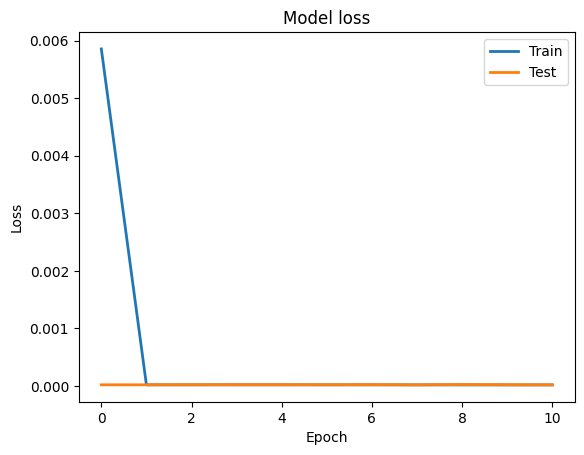

In [30]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend()
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

### Predictions

In [34]:
test_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [32]:
train_predictions = autoencoder.predict(normal_train_data)
train_loss = np.mean(np.power(normal_train_data - train_predictions, 2), axis=1)

6755/6755 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


#### calculating threshold

Calculated threshold based on 99th percentile: 0.00014764982799533757


Text(0.5, 0, 'Data point index')

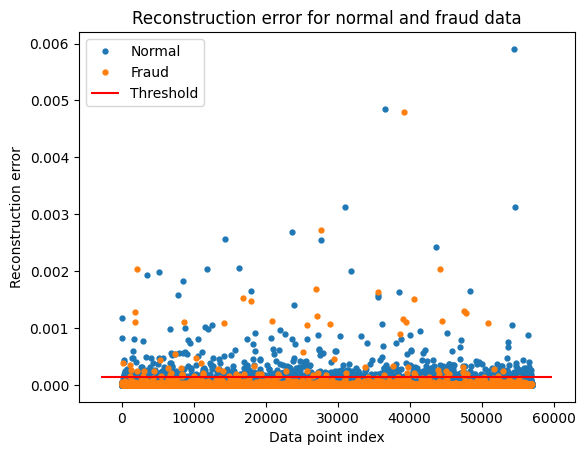

In [36]:
threshold = np.percentile(train_loss, 99)
print("Calculated threshold based on 99th percentile:", threshold)
threshold_fixed = 0.00014653
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

### Evaluating performance

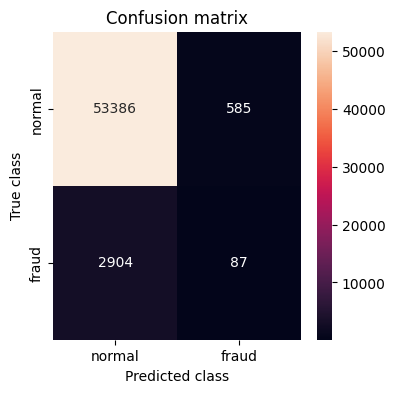

 Accuracy:  0.9387486394438398
 Recall:  0.029087261785356068
 Precision:  0.12946428571428573


In [37]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=['normal','fraud'], yticklabels=['normal','fraud'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))